# **Short Term Electricity Demand Forecasting using Weather Data (Delhi, 5-minute resolution)**

**FEATURE ENGINEERING:**

Feature engineering is the process of creating, modifying, or selecting relevant features from raw data to improve a model's predictive performance. It helps the model capture patterns that may not be obvious from the original data.Some features can highlight trends, seasonality, or relationships in the data.Good features can significantly improve model accuracy without complex algorithms

In thi energy demand forecast we can create new features like Day of Week,Month,Lag Feature.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/energy_data_cleaned.csv")

In [3]:
df.shape

(393440, 14)

In [4]:
df.columns

Index(['datetime', 'Power demand', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd',
       'pres', 'year', 'month', 'day', 'hour', 'minute', 'moving_avg_3'],
      dtype='object')

In [5]:
df.head(50)

,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,1999.076667
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,1999.076667
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55,1952.006667
6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0,1929.186667
7,2021-01-01 01:05:00,1878.74,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,5,1903.976667
8,2021-01-01 01:10:00,1859.68,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,10,1882.133333
9,2021-01-01 01:15:00,1836.56,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,15,1858.326667


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
 #Day of Week (Monday=0, Sunday=6)
df['day_of_week'] = df['datetime'].dt.dayofweek
#Captures patterns between weekdays and weekends.

In [8]:
# Lag Feature (previous timestep demand)
df['lag_1'] = df['Power demand'].shift(1)
#Helps model learn from recent demand, which strongly influences current demand.

In [9]:
df.head()

,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3,day_of_week,lag_1
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,1999.076667,4,NaN
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,1999.076667,4,2014.00
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667,4,2005.63
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667,4,1977.60
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000,4,1976.44


In [10]:
df = df = df.dropna(subset=['lag_1']) #droping nan values first row in lag 1

In [11]:
df.isnull().sum()

,0
datetime,0
Power demand,0
temp,0
dwpt,0
rhum,0
wdir,0
wspd,0
pres,0
year,0
month,0


In [12]:
df.shape

(393439, 16)

In [13]:
df.to_csv('final_energy_data_cleaned.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Power demand vs Day of Week
plt.figure(figsize=(8,5))
sns.boxplot(x='day_of_week', y='Power demand', data=df)
plt.title('Power Demand vs Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Power Demand')
plt.show()




Median demand is slightly higher on Tuesday and Wednesday show higher demand.

Lower median demand appears on Sunday and Monday typical lower usage days.

Spread/variance is wide across all days some spikes reach very high demand (outliers above 8000).

Outliers are visible at the top,very high demands that happen occasionally.

This shows that day_of_week is a meaningful feature the model can learn patterns like weekend dips and weekday peaks.

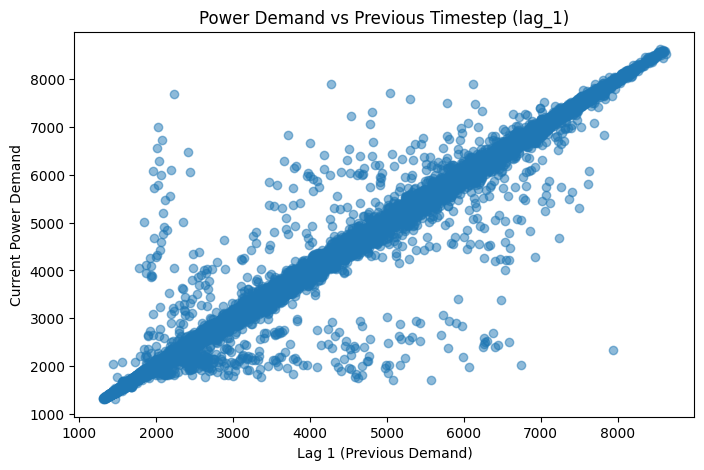

In [ ]:
# Power demand vs Lag_1
plt.figure(figsize=(8,5))
plt.scatter(df['lag_1'], df['Power demand'], alpha=0.5)
plt.title('Power Demand vs Previous Timestep (lag_1)')
plt.xlabel('Lag 1 (Previous Demand)')
plt.ylabel('Current Power Demand')
plt.show()